In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Loading the wine dataset
url = "https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
# Checking for null values
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [5]:
# Separating the target variable (Customer_Segment)
target = data['Customer_Segment']
data = data.drop('Customer_Segment', axis=1)

In [6]:
# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
# Applying PCA
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

In [8]:
# Calculating the explained variance ratio for each principal component
explained_var_ratio = pca.explained_variance_ratio_

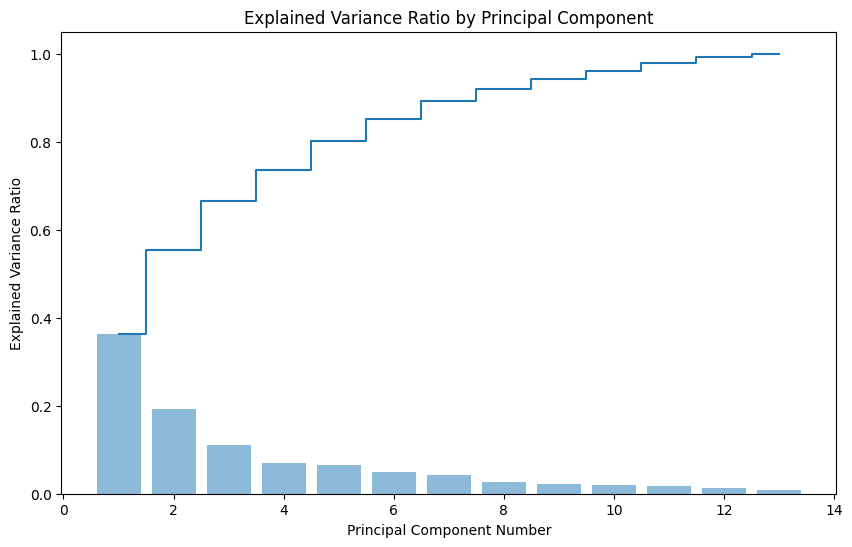

In [9]:
# Plotting the explained variance ratio to determine the number of principal components to keep
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_var_ratio) + 1), explained_var_ratio.cumsum(), where='mid')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

Based on the plot, we choose the number of components that capture most of the variance.
In this case, we can select the number of components as per our requirement, e.g., 2 or 3

In [10]:
# Retaining the desired number of principal components
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

In [11]:
# Creating a new DataFrame with the transformed data
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [12]:
# Addding the target variable back to the DataFrame
pca_df['Customer_Segment'] = target

We can now use pca_df for further analysis or classification tasks

In [13]:
# Printing the components to understand their loadings
print("Principal Components:")
print(pca.components_)

Principal Components:
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


In [14]:
pca_df.head()

,PC1,PC2,Customer_Segment
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


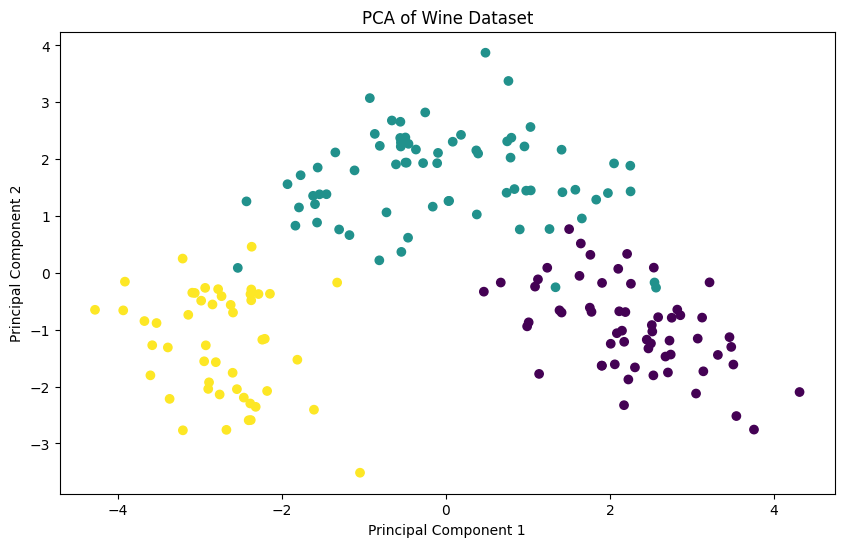

In [15]:
# Visualizing the data in the new space
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.show()

In [16]:
# Saving the PCA-transformed DataFrame to a CSV file
pca_df.to_csv('pca_transformed_wine_data.csv', index=False)